In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

from ydata_profiling import ProfileReport
from sklearn.cluster import KMeans

In [39]:
#pip install ydata-profiling

In [40]:
data = pd.read_csv("resources/Cust_Segmentation.csv")

In [41]:
data.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0,NBA008,7.2


In [42]:
data.isna().sum()

Customer Id        0
Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
Defaulted          0
Address            0
DebtIncomeRatio    0
dtype: int64

In [43]:
data.duplicated().sum()

np.int64(0)

In [44]:
report = ProfileReport(data, title="Customer Segmentation Data Profiling Report", explorative=True)

In [45]:
#report

In [46]:
data = data.drop(columns=['Customer Id'])

In [47]:
data

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0,NBA001,6.3
1,47,1,26,100,4.582,8.218,0,NBA021,12.8
2,33,2,10,57,6.111,5.802,1,NBA013,20.9
3,29,2,4,19,0.681,0.516,0,NBA009,6.3
4,47,1,31,253,9.308,8.908,0,NBA008,7.2
...,...,...,...,...,...,...,...,...,...
845,27,1,5,26,0.548,1.220,0,NBA007,6.8
846,28,2,7,34,0.359,2.021,0,NBA002,7.0
847,25,4,0,18,2.802,3.210,1,NBA001,33.4
848,32,1,12,28,0.116,0.696,0,NBA012,2.9


In [48]:
data.select_dtypes(include='object')
data_address_onehot = pd.get_dummies(data.select_dtypes(include='object'), dtype=int)

In [49]:
data_onehot = pd.concat((data,data_address_onehot),axis=1)
data_onehot = pd.concat([data],axis=1)

In [50]:
data_processed = data_onehot.drop(columns=['Address'])

In [51]:
data_processed

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0,6.3
1,47,1,26,100,4.582,8.218,0,12.8
2,33,2,10,57,6.111,5.802,1,20.9
3,29,2,4,19,0.681,0.516,0,6.3
4,47,1,31,253,9.308,8.908,0,7.2
...,...,...,...,...,...,...,...,...
845,27,1,5,26,0.548,1.220,0,6.8
846,28,2,7,34,0.359,2.021,0,7.0
847,25,4,0,18,2.802,3.210,1,33.4
848,32,1,12,28,0.116,0.696,0,2.9


In [52]:
scaling = StandardScaler()

In [53]:
data_scaled = pd.DataFrame(scaling.fit_transform(data_processed), columns=data_processed.columns)

In [54]:
data_scaled.shape

(850, 8)

In [55]:
kmeans = KMeans(n_clusters=3, random_state=42)

In [56]:
kmeans.fit(data_scaled)

KMeans(n_clusters=3, random_state=42)

In [57]:
kmeans.cluster_centers_

array([[-1.49558091e-01, -1.14064018e-01, -1.34481828e-01,
        -2.72413651e-01, -3.35659257e-01, -3.69866734e-01,
        -5.23796543e-01, -3.24345859e-01],
       [-3.90439547e-01,  1.62695612e-01, -6.79376729e-01,
        -3.86448408e-01, -6.83901553e-05, -6.93056978e-02,
         1.87982575e+00,  5.69270845e-01],
       [ 1.00292949e+00,  2.37745062e-01,  1.27767064e+00,
         1.45504409e+00,  1.24780477e+00,  1.45422700e+00,
        -2.04998195e-01,  5.53954880e-01]])

In [58]:
kmeans.predict(data_scaled)

array([0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0,
       1, 2, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 2, 1, 2, 0, 2,
       0, 2, 0, 0, 0, 0, 2, 2, 1, 0, 1, 1, 1, 0, 0, 0, 2, 0, 2, 2, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 2, 0, 2, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 2, 0, 1, 1, 2, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 2, 1, 0,
       0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 2,
       2, 0, 2, 0, 1, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0,
       1, 2, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 2, 0, 1,
       2, 1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 2, 0, 0, 2, 0,
       2, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 1, 2, 0,

In [59]:
data['kmeans_cluster'] = kmeans.predict(data_scaled)

In [60]:
data.groupby('kmeans_cluster').Age.mean()

kmeans_cluster
0    33.827458
1    31.891566
2    43.089655
Name: Age, dtype: float64

In [61]:
data.groupby('kmeans_cluster').Edu.mean()

kmeans_cluster
0    1.604824
1    1.861446
2    1.931034
Name: Edu, dtype: float64

In [62]:
data.groupby('kmeans_cluster')['Years Employed'].mean()

kmeans_cluster
0     7.654917
1     3.963855
2    17.220690
Name: Years Employed, dtype: float64

In [63]:
data.groupby('kmeans_cluster')['Defaulted'].mean()

kmeans_cluster
0    0.000000
1    0.987952
2    0.131034
Name: Defaulted, dtype: float64

In [64]:
data.groupby('kmeans_cluster').mean(numeric_only=True)

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
kmeans_cluster,,,,,,,,
0,33.827458,1.604824,7.654917,36.181818,0.863681,1.822410,0.000000,7.993506
1,31.891566,1.861446,3.963855,31.789157,1.576675,2.843355,0.987952,13.994578
2,43.089655,1.931034,17.220690,102.724138,4.227897,8.018490,0.131034,13.891724


In [65]:
# Cluster 1: High Income Category, High Debt, Experienced, High Educated
# Cluster 2: Young, Least Experienced, Low Income, Low Debt, Low Educated
# Cluster 3: Older, Experienced, Medium Income, Medium Debt, Less Defaulted

In [66]:
res = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_scaled)
    res.append(kmeans.inertia_)

In [67]:
res

[6800.0,
 5194.763767111648,
 4339.096705895337,
 3854.1293494687616,
 3487.2169260717756,
 3102.4999683803453,
 2920.6319296731567,
 2716.872572838103,
 2581.4626027791824]

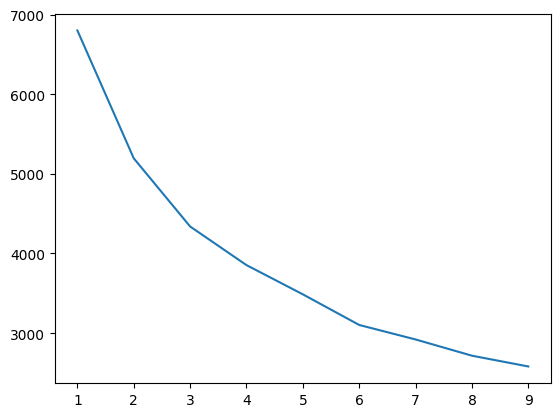

In [68]:
plt.plot(range(1,10), res)
plt.show()

In [69]:
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(data_scaled)

KMeans(n_clusters=6, random_state=42)

In [70]:
data['kmeans_cluster'] = kmeans.predict(data_scaled)
data.groupby('kmeans_cluster').mean(numeric_only=True)

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
kmeans_cluster,,,,,,,,
0,41.757764,1.453416,16.621118,72.130435,1.423050,2.820124,0.006211,6.450932
1,31.486111,1.729167,3.541667,28.888889,1.395889,2.400583,1.000000,13.427778
2,33.593023,3.523256,4.906977,44.453488,1.039023,2.411977,0.069767,8.256977
3,46.285714,1.928571,22.642857,213.142857,11.737786,16.239857,0.571429,16.821429
4,39.775701,1.878505,13.224299,68.233645,3.939009,8.106495,0.224299,19.047664
5,31.730769,1.301775,5.742604,28.973373,0.695322,1.523817,0.000000,7.958580


In [71]:
# Cluster 1: Least Debt To Income Ratio
# Cluster 2: 100% they will default
# Cluster 3: High Educated People
# Cluster 4: High Profile Rich People, Oldest
# Cluster 5: Highest Debt To Income Ratio
# Cluster 6: Young and never default

In [72]:
from sklearn.metrics import silhouette_score

In [73]:
print(silhouette_score(data_scaled, kmeans.labels_))

0.24461829828791243
